PARABOLA

In [1]:
%matplotlib inline
import matplotlib
import os
import itertools
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from SensorimotorExploration.DataManager.SimulationData import load_sim_h5_v2 as load_sim_h5
from SensorimotorExploration.DataManager.PlotTools import *

In [3]:
def create_dict(groups_k):
    return {k[0] + '_' + k[1]+ '_' + k[2]: [] for k in groups_k}

def incremental_mean(arr_):
    n_samples = len(arr_)
    sum_ = 0
    out = []
    for i in range(n_samples):
        sum_ += arr_[i]
        out += [sum_/(i + 1.)]
    out = np.array(out).flatten()
    return out

def moving_av(arr_, win_sz):
    n_samples = len(arr_)
    sum_ = 0
    out = []
    for i in range(win_sz):
        sum_ += arr_[i]
        out += [sum_/(i + 1.)]
    for i in range(win_sz,n_samples):
        sum_ = sum_ + arr_[i] - arr_[i-win_sz]
        out += [sum_/win_sz]
    out = np.array(out).flatten()
    return out

def std_markers(ax,y,m,c,sz):
    plt.sca(ax)
    plt.hold(True)
    for i,(y_,ms_) in enumerate(zip(y,sz)):
        plt.plot(i, y_, marker = m, ms = ms_, color = c)

In [7]:
directory = 'experiment_1_ssm/'
data_files = os.listdir(directory)

# Group by:
type_ops = ['proprio', 'simple']
mode_ops = ['autonomous']
expl_space_ops = ['somato ','sensor ']

groups_k = list(itertools.product(type_ops, mode_ops, expl_space_ops))

#container for
means_e = create_dict(groups_k)
means_av_e = create_dict(groups_k)

#container for
means_s = create_dict(groups_k)
means_av_s = create_dict(groups_k)

#container for
means_w = create_dict(groups_k)
means_av_w = create_dict(groups_k)

#container for
coll_e = create_dict(groups_k)
coll_av_e = create_dict(groups_k)

#container for
coll_s = create_dict(groups_k)
coll_av_s = create_dict(groups_k)

#container for
coll_w = create_dict(groups_k)
coll_av_w = create_dict(groups_k)

#container for interactions data 
#inter = create_dict(groups_k)
#inter_av = create_dict(groups_k)

#container for
error_ev = create_dict(groups_k)
error_ev_av = create_dict(groups_k)

#container for
std_ev = create_dict(groups_k)

#container for
comp_w = create_dict(groups_k)
comp_av_w = create_dict(groups_k)

ss_comp_w = create_dict(groups_k)
ss_comp_av_w = create_dict(groups_k)

for data_file in (d_f for d_f in data_files if 'sim_data.h5' in d_f):
    data_file = directory + data_file
    conf_file = data_file.replace('sim_data.h5', 'conf.txt')
    conf = {}
    with open(conf_file) as f:
        for line in f:
            line = line.replace('\n', '')
            (key, val) = line.split(': ')
            conf[key] = val

    try:
        data = load_sim_h5(data_file)
        #interaction_data = data.social.data.as_matrix(columns=None)
        #interactions = np.zeros((interaction_data.shape[0],))
        #interactions[~np.isnan(interaction_data[:, 0])] = 1

        social_data = load_sim_h5(data_file.replace('sim_data.h5', 'sensori_eva_valset.h5'))
        whole_data = load_sim_h5(data_file.replace('sim_data.h5', 'somato_eva_valset.h5'))

        s_error_ = np.linalg.norm(social_data.sensor_goal.data.as_matrix() -
                                  social_data.sensor.data.as_matrix(), axis=1)
        
        s_con_v = social_data.cons.data.as_matrix()
    
        
        ss_error_ = np.linalg.norm(whole_data.sensor.data.as_matrix() -
                                  whole_data.sensor.data.as_matrix(), axis=1)

        ss_con_v = data.cons.data.as_matrix()

        e_con_v = data.cons.data.as_matrix()
        
        
        
        error_ = np.linalg.norm(data.sensor_goal.data.as_matrix() -
                                          data.sensor.data.as_matrix(), axis=1)

        error_ss_ = np.linalg.norm(data.somato_goal.data.as_matrix() -
                                  data.somato.data.as_matrix(), axis=1)


        eva_errors = []
        with open(data_file.replace('sim_data.h5', 'eval_error.txt'), 'r') as f:
            for line in f:
                line.replace('\n', '')
                eva_errors_str = line.split(': ')
                eva_errors += [float(eva_errors_str[1])]

        means_s[conf['type'] + '_' + conf['mode']+'_'+conf['expl_space']] += [np.mean(s_error_)]
        means_w[conf['type'] + '_' + conf['mode']+'_'+conf['expl_space']] += [np.mean(ss_error_)]

        
        coll_s[conf['type'] + '_' + conf['mode']+'_'+conf['expl_space']] += [s_con_v]
        coll_w[conf['type'] + '_' + conf['mode']+'_'+conf['expl_space']] += [ss_con_v[:2200]]
        coll_e[conf['type'] + '_' + conf['mode']+'_'+conf['expl_space']] += [e_con_v[:2200]]
        
#         inter[conf['type'] + '_' + conf['mode']+'_'+conf['expl_space']] += [interactions]

        error_ev[conf['type'] + '_' + conf['mode']+'_'+conf['expl_space']] += [eva_errors]

        comp_w[conf['type'] + '_' + conf['mode']+'_'+conf['expl_space']] += [error_[:2200]]
        ss_comp_w[conf['type'] + '_' + conf['mode']+'_'+conf['expl_space']] += [error_ss_[:2200]]  
        
    except IOError:
        pass

legend = []
max_std = 0
for i, k in enumerate(groups_k):
    print(k)
    group = k[0] + '_' + k[1] + '_' + k[2]
    legend += [group]

    means_av_s[group] = np.mean(np.array(means_s[group]))
    means_av_w[group] = np.mean(np.array(means_w[group]))

    
    coll_av_s[group] = np.mean(np.array(coll_s[group]), axis=0)
    coll_av_w[group] = np.mean(np.array(coll_w[group]), axis=0)
    coll_av_e[group] = np.mean(np.array(coll_e[group]), axis=0)

    
#     inter_av[group] = np.mean(np.array(inter[group]), axis=0)
    
    comp_av_w[group] = np.mean(np.array(comp_w[group]), axis=0)
    ss_comp_av_w[group] = np.mean(np.array(ss_comp_w[group]), axis=0)
    
    error_ev_av[group] = np.mean(np.array(error_ev[group]), axis=0)
    std_ev[group] = np.std(np.array(error_ev[group]),axis=0)
    max_std = max(max_std,max(std_ev[group].flatten()))
    
    
print(max_std)

('proprio', 'autonomous', 'somato ')
('proprio', 'autonomous', 'sensor ')
('simple', 'autonomous', 'somato ')
('simple', 'autonomous', 'sensor ')
0.14640097126


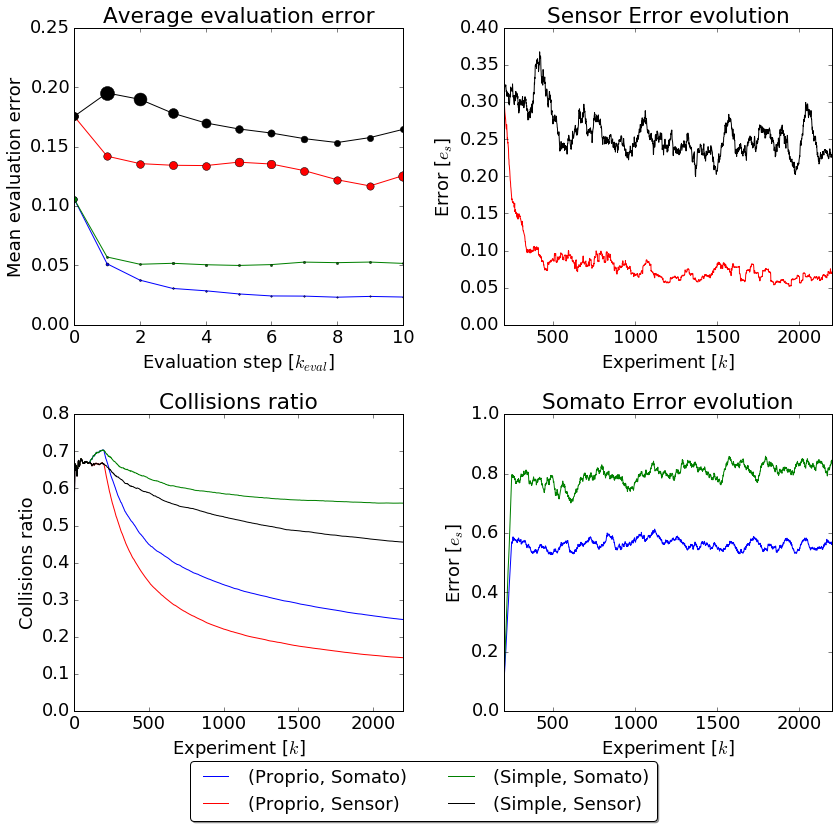

In [8]:
matplotlib.rcParams['figure.figsize'] = (12.0, 11.0)
matplotlib.rcParams.update({'font.size': 18})


fig1, ax1 = plt.subplots(2,2)
plt.sca(ax1[0,0])
ax1[0,0].set_title('Average evaluation error')
plt.hold(True)
plt.plot(error_ev_av['proprio_autonomous_somato '], linestyle='-', marker='', color='b')
ms1 = [(x/max_std)*13 + 1 for x in std_ev['proprio_autonomous_somato ']]

plt.plot(error_ev_av['proprio_autonomous_sensor '], linestyle='-', marker='', color='r')
ms2 = [(x/max_std)*13 + 1 for x in std_ev['proprio_autonomous_sensor ']]

plt.plot(error_ev_av['simple_autonomous_somato '], linestyle='-', marker='', color='g')
ms3 = [(x/max_std)*13 + 1 for x in std_ev['simple_autonomous_somato ']]

plt.plot(error_ev_av['simple_autonomous_sensor '], linestyle='-', marker='', color='k')
ms4 = [(x/max_std)*13 + 1 for x in std_ev['simple_autonomous_sensor ']]

std_markers(ax1[0,0],error_ev_av['proprio_autonomous_somato '],'o','b',ms1)
std_markers(ax1[0,0],error_ev_av['proprio_autonomous_sensor '],'o','r',ms2)
std_markers(ax1[0,0],error_ev_av['simple_autonomous_somato '],'o','g',ms3)
std_markers(ax1[0,0],error_ev_av['simple_autonomous_sensor '],'o','k',ms4)

plt.xlabel('Evaluation step [$k_{eval}$]')
plt.ylabel('Mean evaluation error')
# plt.legend(['(Proprio, Social)', '(Proprio, Auto)', '(Simple, Social)', '(Simple, Auto)'],\
#            ncol=2,loc='lower right', fontsize=13)
ax1[0,0].set_xlim([0,10])
ax1[0,0].set_ylim([0,0.25])

plt.sca(ax1[0,1])
ax1[0,1].set_title('Sensor Error evolution')
win_sz=50
# plt.plot(moving_av(comp_av_w['proprio_autonomous_somato '],win_sz), linestyle='-', marker='', color='b')
plt.plot(moving_av(comp_av_w['proprio_autonomous_sensor '],win_sz), linestyle='-', marker='', color='r')
plt.hold(True)
# plt.plot(moving_av(comp_av_w['simple_autonomous_somato '],win_sz), linestyle='-', marker='', color='g')
plt.plot(moving_av(comp_av_w['simple_autonomous_sensor '],win_sz), linestyle='-', marker='', color='k')
plt.xlabel('Experiment [$k$]')
plt.ylabel('Error [$e_s$]')
# plt.legend(['(Proprio, Social)', '(Proprio, Auto)', '(Simple, Social)', '(Simple, Auto)'],\
#            ncol=2,loc='lower right', fontsize=13)
ax1[0,1].set_xlim([200,2200])
ax1[0,1].set_ylim([0,0.4])


plt.sca(ax1[1,0])
ax1[1,0].set_title('Collisions ratio')
plt.plot(incremental_mean(coll_av_w['proprio_autonomous_somato ']), linestyle='-', marker='', color='b')
plt.hold(True)
plt.plot(incremental_mean(coll_av_w['proprio_autonomous_sensor ']), linestyle='-', marker='', color='r')
plt.plot(incremental_mean(coll_av_w['simple_autonomous_somato ']), linestyle='-', marker='', color='g')
plt.plot(incremental_mean(coll_av_w['simple_autonomous_sensor ']), linestyle='-', marker='', color='k')
plt.xlabel('Experiment [$k$]')
plt.ylabel('Collisions ratio')
lgd = plt.legend(['(Proprio, Somato)', '(Proprio, Sensor)', '(Simple, Somato)', '(Simple, Sensor)'],\
           ncol=2,loc='lower right', fontsize=18, bbox_to_anchor=(1.8, -0.4),
          fancybox=True, shadow=True)
ax1[1,0].set_xlim([0,2200])
ax1[1,0].set_ylim([0,0.8])

plt.sca(ax1[1,1])
ax1[1,1].set_title('Somato Error evolution')
win_sz=50
plt.plot(moving_av(ss_comp_av_w['proprio_autonomous_somato '],win_sz), linestyle='-', marker='', color='b')
# plt.plot(moving_av(comp_av_w['proprio_autonomous_sensor '],win_sz), linestyle='-', marker='', color='r')
plt.hold(True)
plt.plot(moving_av(ss_comp_av_w['simple_autonomous_somato '],win_sz), linestyle='-', marker='', color='g')
# plt.plot(moving_av(comp_av_w['simple_autonomous_sensor '],win_sz), linestyle='-', marker='', color='k')
plt.xlabel('Experiment [$k$]')
plt.ylabel('Error [$e_s$]')
# plt.legend(['(Proprio, Social)', '(Proprio, Auto)', '(Simple, Social)', '(Simple, Auto)'],\
#            ncol=2,loc='lower right', fontsize=13)
ax1[1,1].set_xlim([200,2200])
ax1[1,1].set_ylim([0,1])

# plt.sca(ax1[1,1])
# ax1[1,1].set_title('Interactions ratio')
# plt.plot(incremental_mean(inter_av['proprio_autonomous_somato']), linestyle='-', marker='', color='b')
# plt.hold(True)
# plt.plot(incremental_mean(inter_av['simple_autonomous_somato']), linestyle='-', marker='', color='g')
# plt.xlabel('Experiment [$k$]')
# plt.ylabel('Interactions ratio')
# plt.legend(['(Proprio, Social)', '(Simple, Social)'],\
#            ncol=1,loc='lower right', fontsize=13.)
# ax1[1,1].set_xlim([0,2200])
# ax1[1,1].set_ylim([0,0.08])

plt.tight_layout()

In [10]:
# fig1.savefig('/home/yumilceh/Dropbox/Aplicaciones/ShareLaTeX/Epirob 2017/images/parabola_results.eps',\
#              format='eps', dpi=1000, bbox_extra_artists=(lgd,), bbox_inches='tight')

In [13]:
comp_w

{'proprio_autonomous_sensor ': [array([ 4.49337296,  8.85287653,  7.68989917, ...,  0.0538628 ,
          0.01836103,  0.0101753 ]),
  array([ 2.54774634,  3.11437943,  4.13333604, ...,  0.05836419,
          0.02744888,  0.0156445 ]),
  array([ 2.23632728,  3.93589579,  4.81785732, ...,  0.00673266,
          0.06852466,  0.10791412]),
  array([  5.03331832e+00,   8.76039118e+00,   6.35172456e+00, ...,
           6.88305372e-03,   1.45352564e-01,   3.55098925e-02]),
  array([ 3.60821685,  8.30524247,  2.23786291, ...,  0.06509558,
          0.05988629,  0.02694835]),
  array([ 5.94652453,  7.02946093,  4.28945945, ...,  0.02229716,
          0.04219335,  0.03292083]),
  array([  2.31461221e+00,   9.24403205e+00,   5.03703535e+00, ...,
           4.94680086e-02,   6.33693446e-03,   2.18356047e-02]),
  array([  3.74427635e+00,   5.45973319e+00,   8.19210001e+00, ...,
           5.87189713e-02,   7.41616403e-03,   2.44048156e-02]),
  array([ 2.25278234,  2.49281987,  3.11437951, ...,  0.

In [ ]:
# art = []
# lgd = pylab.legend(loc=9, bbox_to_anchor=(0.5, -0.1), ncol=2)
# art.append(lgd)
# pylab.savefig(
#     "/tmp/foo-fixed.png", additional_artists=art,
#     bbox_inches="tight")

fig1, ax1 = plt.subplots(1,1)
plt.sca(ax1)
ax1.set_title('Average evaluation error during exploration')
plt.errorbar(range(12),error_ev_av['proprio_autonomous_somato'],0.*std_ev['proprio_autonomous_somato'],linestyle='-', marker='o', color='b')
plt.hold(True)
plt.errorbar(range(12),error_ev_av['proprio_autonomous_sensor'],0.*std_ev['proprio_autonomous_sensor'], linestyle='-', marker='o', color='r')
plt.errorbar(range(12),error_ev_av['simple_autonomous_somato'],std_ev['simple_autonomous_somato'], linestyle='-', marker='o', color='g')
plt.errorbar(range(12),error_ev_av['simple_autonomous_sensor'],0.*std_ev['simple_autonomous_sensor'], linestyle='-', marker='o', color='k')
plt.xlabel('Evaluation step [k]')
plt.ylabel('Average evaluation error')
plt.legend(['(Proprio, Social)', '(Proprio, Auto)', '(Simple, Social)', '(Simple, Auto)'],\
           ncol=2,loc='lower right', fontsize=15)
ax1.set_ylim([0,0.5])